In [1]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## ** 머신러닝 2주차 실습 (Due 6/8 10pm) **

### Examples on Supervised Learning (Classification & Regression)


---
#### ** 1) [이종분류(Binary Classification)]** 
   
   $x_1,\,x_2$ 2차원 평면에 **두 종류**의 데이터가 분포해있을때, 임의의 $(x_1,x_2)$위치의 테스트 데이터가 각각의 종에 속할 확률을 예측하는, 이종 분류 신경망을 건설하고 훈련시켜보자.

    - 훈련한 모형의 예측치를 matplotlib를 활용하여 시각화해보자.
    - 각 epoch마다 성능을 평가하여 학습곡선을 그려보자. 
    - 각 종의 데이터에 대하여, 신경망 출력값들의 분포를 살펴보고, ROC (Receiver Operating Charateristic) 곡선을 그려보자. 


* 훈련 & 테스트 데이터의 로딩 그리고 시각화

In [2]:
import numpy as np
load_model_np_circles = np.load('2Classes_2d_circles.npy')
load_model_np_moons = np.load('2Classes_2d_moons.npy')
load_model_np_blobs = np.load('3Classes_2d_blobs.npy')
load_model_np_ls = np.load('3Classes_2d_linearly_separable.npy')
print (len(load_model_np_circles))
print (len(load_model_np_moons))
print (len(load_model_np_blobs))
print (len(load_model_np_ls))

10000
10000
10000
10000


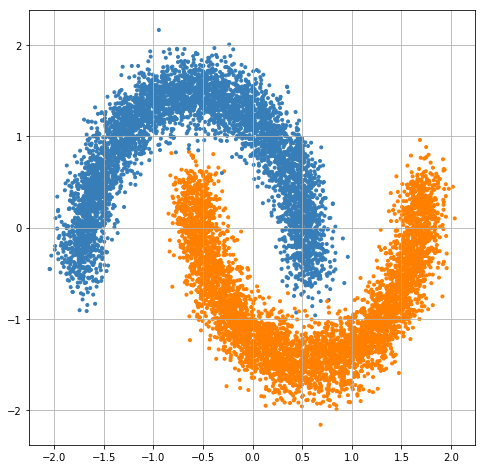

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice

# data = load_model_np_circles
# len(data)
data = load_model_np_moons

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(data[:,0]) + 1))))
ax.scatter(data[:,1],data[:,2], color=colors[data[:,0].astype(int)], marker='.')
# ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm_bright, marker='.')

ax.grid(True)

plt.show()

In [4]:
%reload_ext autoreload
%autoreload 2

import NNfactory

In [22]:
# structure = '2:identity|50:tanh|2:softmax'
# mynn = NNfactory.MLP(model_nametag='mlp_circle_model',model_structure=structure)

#  * epoch = 10
#  [====================] 100%
#  > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  1.0  | (정답수)/(테스트 데이터수) =  1001 / 1001
#  * 현재 평균에러 =  0.0560272440797

#  > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  1.0  | (정답수)/(테스트 데이터수) =  501 / 501
#  * 현재 평균에러 =  0.058080981035



# structure = '2:identity|10:tanh|2:softmax'
# mynn = NNfactory.MLP(model_nametag='mlp_moon_model',model_structure=structure)

#  * epoch = 100
#  [====================] 100%
#  > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  0.991008991009  | (정답수)/(테스트 데이터수) =  992 / 1001
#  * 현재 평균에러 =  0.0182589639464

#  > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  0.99001996008  | (정답수)/(테스트 데이터수) =  496 / 501
#  * 현재 평균에러 =  0.0206823541543



# structure = '2:identity|50:relu|50:relu|2:softmax'
# mynn = NNfactory.MLP(model_nametag='mlp_moon_model_2relu',model_structure=structure)

#  * epoch = 21
#  [====================] 100%
#  > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  0.999000999001  | (정답수)/(테스트 데이터수) =  1000 / 1001
#  * 현재 평균에러 =  0.00504846968812

#  > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
#  * 현재 정확도  =  0.992015968064  | (정답수)/(테스트 데이터수) =  497 / 501
#  * 현재 평균에러 =  0.0078853153097


structure = '2:identity|50:relu|50:relu|2:softmax'
mynn = NNfactory.MLP(model_nametag='mlp_moon_model_2relu',model_structure=structure)



 * 다음과 같은 구조의 다층퍼셉트론 연결이 초기화 되었습니다 *

 > 모델이름 = mlp_moon_model_2relu
 > 총 층수 (입력 + 은닉(s) + 출력) =  4
 > 각 층에서의 노드수 =  [2, 50, 50, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.005


In [23]:
from time import sleep
import sys
import numpy as np

# 데이터 준비
data_type=None
training_data_list = load_model_np_moons
# training_data_list = load_model_np_circles

n_class = int(training_data_list[:,0].max()+1)
dim_x = len(training_data_list[0])-1
print(' * n_class = ',n_class)
print(' * dim_x = ',dim_x)

 * n_class =  2
 * dim_x =  2


In [24]:
# 최대 학습 주기 설정
epochs = 100

n_data_tot=len(training_data_list)
n_data_max=1000  # 훈련에 사용할 데이터 갯수 (최대 60000)
n_data_test=min(int((n_data_tot-n_data_max)*0.5),int(n_data_max*0.5))
n_data = len(training_data_list[:n_data_max])
dn_data = int(n_data/20)
print (dn_data)

for e in range(epochs):
    # go through all data in the training data set
    print(' * epoch = {}'.format(e+1))
    id_data = 0
    
    for data in training_data_list[:n_data_max]:
        
        # 프로세스 게이지
        id_data += 1
        if (id_data%dn_data==0):
            sys.stdout.write('\r')
            sys.stdout.write(' [%-20s] %d%%' % ( '='*(id_data//dn_data), 5*(id_data//dn_data)))
            sys.stdout.flush()
            sleep(0.25)
        
        # 입력/지도 데이터 가공 
        if data_type == 'mnist':
            # split the mnist data by the ',' commas
            all_values = data.split(',')
            # 입력 데이터 스케일링 
            input_list = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # 지도 라벨 벡터 가공 (shape = (10,))
            target_list = np.zeros(10) #mynn.n_nodes[-1])
            # all_values[0] is the target label for this data
            target_list[int(all_values[0])] = 1.0
            
        else:
        
            input_list = data[1:] #np.asfarray(all_values[1:])        
            target_list = np.zeros(n_class)
            target_list[int(data[0])] = 1
        
        mynn.train(input_list, target_list)
        
        pass
    
    print('')
    print(' > 훈련 샘플에 대한 성능 (정확도 & 평균에러) ')
    mynn.check_accuracy_error(training_data_list, 0, n_data_max, data_type=None)
    print('')
    print(' > 테스트 샘플에 대한 성능 (정확도 & 평균에러) ')
    mynn.check_accuracy_error(training_data_list, n_data_max, n_data_max + n_data_test, data_type=None)
        
    print('\n')
    
    pass

50
 * epoch = 1
 [====================] 100%
 > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.922077922078  | (정답수)/(테스트 데이터수) =  923 / 1001
 * 현재 평균에러 =  0.0605745362392

 > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.90618762475  | (정답수)/(테스트 데이터수) =  454 / 501
 * 현재 평균에러 =  0.0633234836917


 * epoch = 2
 [====================] 100%
 > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.942057942058  | (정답수)/(테스트 데이터수) =  943 / 1001
 * 현재 평균에러 =  0.0462387354412

 > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.926147704591  | (정답수)/(테스트 데이터수) =  464 / 501
 * 현재 평균에러 =  0.0489132433709


 * epoch = 3
 [====================] 100%
 > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.963036963037  | (정답수)/(테스트 데이터수) =  964 / 1001
 * 현재 평균에러 =  0.0372207031619

 > 테스트 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.958083832335  | (정답수)/(테스트 데이터수) =  480 / 501
 * 현재 평균에러 =  0.0399035266512


 * epoch = 4
 [====================] 100%
 > 훈련 샘플 학습도 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.975024975025  | (정답수)/(테스트 데이터수) =  976 / 10

KeyboardInterrupt: 

* 훈련한 모형의 저장

훈련된 모형은 NNfactory클래스 안의 save_model메소드를 사용하여 .npy포맷의 numpy array로 저장할 수 있다.

In [25]:
# mynn.save_model(fname='mlp_circle_model.npy', nametag='mlp_circle_model')
mynn.save_model(fname='mlp_moons_model_2relu.npy', nametag='mlp_moons_model_2relu')

* 저장된 모형 불러오기 :

방법1) 껍데기 신경망 인스턴스를 선언하고, 그 인스턴스의 load_model메소드를 이용하여 저장된 .npy파일로부터 신경망을 직접 로드한다 

In [5]:
mynn2 = NNfactory.MLP()
# mynn2.load_model(fname='mlp_circle_model.npy')
mynn2.load_model(fname='mlp_moons_model_2relu.npy')


 * 다음과 같은 구조의 다층퍼셉트론 연결이 초기화 되었습니다 *

 > 모델이름 = a MLP
 > 총 층수 (입력 + 은닉(s) + 출력) =  3
 > 각 층에서의 노드수 =  [784, 100, 10]
 > 각 층에서의 활성화 함수 =  ['identity', 'tanh', 'softmax']
 > 학습률(Learning Rate) =  0.005

 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = mlp_moons_model_2relu
 > 총 층수 (입력 + 은닉(s) + 출력) =  4
 > 각 층에서의 노드수 =  [2, 50, 50, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.005


* 저장된 모형 불러오기 :

방법2) 저장된 .npy파일로부터 신경망정보가 담긴 넘파이 배열을 직접 로드하고, 이 넘파이 배열을 새 신경망 인스턴스 생성에 사용하여 저장된 모형과 똑같은 신경망을 로드한다.

In [11]:
mynn3 = NNfactory.MLP(load_model_np=np.load('mlp_circle_model.npy'))


 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = mlp_circle_model
 > 총 층수 (입력 + 은닉(s) + 출력) =  3
 > 각 층에서의 노드수 =  [2, 50, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'tanh', 'softmax']
 > 학습률(Learning Rate) =  0.005


* 학습한 확률 모형을 시각화해보기 (확률모형의 출력을 2d에 contour plot해보자)

In [7]:
# event 하나에 대한 출력값 테스트
# data = load_model_np_circles
data = load_model_np_moons

data[0,1:]

array([ 1.68973986, -0.4534332 ])

In [8]:
print (mynn2.feedforward(data[0,1:]), data[0,0])


[[ 0.01936086]
 [ 0.98063914]] 1.0


In [9]:
# ===================================== #
# define a mesh grid of (x1var, x2var)
# > x1_mesh[n_x2, n_x1] => mapping of (x1_i, x2_j) point to actual x1 value at the point
# > x2_mesh[n_x2, n_x1] => mapping of (x1_i, x2_j) point to actual x2 value at the point
# ===================================== #

## data grid
x1_min, x1_max = data[:,1].min(), data[:,1].max()
x2_min, x2_max = data[:,2].min(), data[:,2].max()
n_x1 = 100
n_x2 = 100

# data = load_model_np_circles
data = load_model_np_moons
# len(data)

x1 = np.linspace(x1_min, x1_max, n_x1)
x2 = np.linspace(x2_min, x2_max, n_x2)

x1_mesh, x2_mesh = np.meshgrid(x1, x2)#, indexing='xy')
# data_mesh = np.array([x1_mesh, x2_mesh])
# data_mesh2 = np.meshgrid(x1, x2, indexing='xy')

X_list = np.zeros(n_x1*n_x2*2).reshape(n_x2,n_x1,2)
Z_list = np.zeros(n_x1*n_x2).reshape(n_x2,n_x1)

# print('nx1 = '+str(nx1)+', x1_array = ',x1_array)
# print('nx2 = '+str(nx2)+', x2_array = ',x2_array)

# Z_mesh = mynn.feedforward([x1_mesh, x2_mesh])
for i in range(n_x1):
    for j in range(n_x2):
        X_list[j,i][0] = x1_mesh[j,i]
        X_list[j,i][1] = x2_mesh[j,i]
        #X_list[j,i][0] = x2_mesh[j,i]
        Z_list[j,i] = mynn2.feedforward(X_list[j,i])[0]

print('x1_mesh.shape = ',x1_mesh.shape)
print('x2_mesh.shape = ',x2_mesh.shape)
print('X_list.shape  = ',X_list.shape)

# mynn.feedforward(X_list[0,0])

Z_list[0,0]


x1_mesh.shape =  (100, 100)
x2_mesh.shape =  (100, 100)
X_list.shape  =  (100, 100, 2)


0.33170785095311622

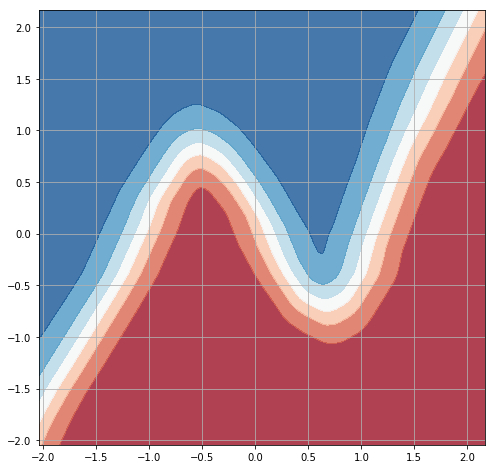

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice

# data = load_model_np_circles
data = load_model_np_moons

# len(data)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

x1 = np.linspace(data[:,1].min(),data[:,2].max(),100)
x2 = np.linspace(data[:,1].min(),data[:,2].max(),100)

x1_mesh, x2_mesh = np.meshgrid(x1,x2)


cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
# cm = plt.cm.bwr # RdBd
# cm_bright = ListedColormap(['#0000FF','#FF0000'])  # #FF0000:red, #00FF00:green #0000FF:blue 


# ======================================= #
# 1-1) Plotting model prediction contour  #
# ======================================= #
ax.contourf(x1_mesh, x2_mesh, Z_list, cmap=cm, alpha=.8)
# ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm, marker='.')
# ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm_bright, marker='.')


ax.grid(True)


plt.show()

---
#### ** 2) [다종분류(Multi-class Classification)]** 

$ x_1,\,x_2\,\in \, [0,10]$ 2차원 평면에 **세 종류**의 데이터가 분포해있을때, 주어진 $(x_1,x_2)$ 위치의 테스트 테이터가 각각의 종에 속할 확률을 예측하는, 다종 분류 신경망을 건설하고 훈련시켜보자.
    
    - 훈련한 모형의 예측치를 matplotlib를 활용하여 시각화해보자.
    - 각 epoch마다 성능을 평가하여 학습곡선을 그려보자. 


---
#### ** 3) [회귀(Regressions)]** 1D data $x$ with continous label $y$, $x\rightarrow y(x)$

   - 회귀모형에서는 출력층의 활성화함수를 항등원 $f(a)=a$를 사용한다. 이에 맞도록 역전파식이 적절히 수정된 신경망 클래스를 작성해보고, 훈련시켜보자.  
   - 훈련한 모형의 예측치를 matplotlib를 활용하여 시각화해보자.
   - 각 epoch마다 성능을 평가하여 학습곡선을 그려보자. 


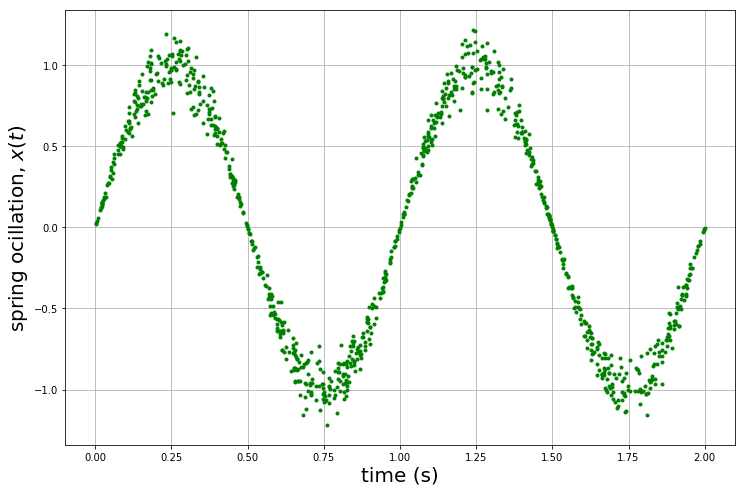

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 2-1,2-2) Data generation

T = np.random.uniform(0,2,1000)
# T.sort()

# model
a = 1.
b = 0.
X = a*np.sin(2*np.pi*T) + b
# noise 
dX = (X/10) * np.random.randn(len(X))
# experimental value = model + noise
X_exp = X  + dX


# 2-3) Plotting

## plot objects (figure & axes)
fig1 = plt.figure(figsize=(12,8))
ax1 = fig1.add_subplot(111)

ax1.plot(T, X_exp, 'g.')
ax1.set_xlabel('time (s)', fontsize=20)
ax1.set_ylabel('spring ocillation, $x(t)$', fontsize=20)
ax1.grid(True)

plt.show()
